In [1]:
#Instalace závislostí
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import závislostí
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Načtení dat
tags_df = pd.read_csv("steamspy_tag_data.csv")
tags_df['num_tags'] = tags_df.drop(columns=['appid']).sum(axis=1)
tags_df['num_tags'].describe()

count     29022.000000
mean        420.561850
std        2960.873043
min           0.000000
25%          64.000000
50%         104.000000
75%         211.000000
max      209492.000000
Name: num_tags, dtype: float64

In [4]:
# Základní informace
display(tags_df.head())
tags_df.info()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,num_tags
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,550,15599
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1635
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,122,0,0,0,988
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,384
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1778


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Columns: 373 entries, appid to num_tags
dtypes: int64(373)
memory usage: 82.6 MB


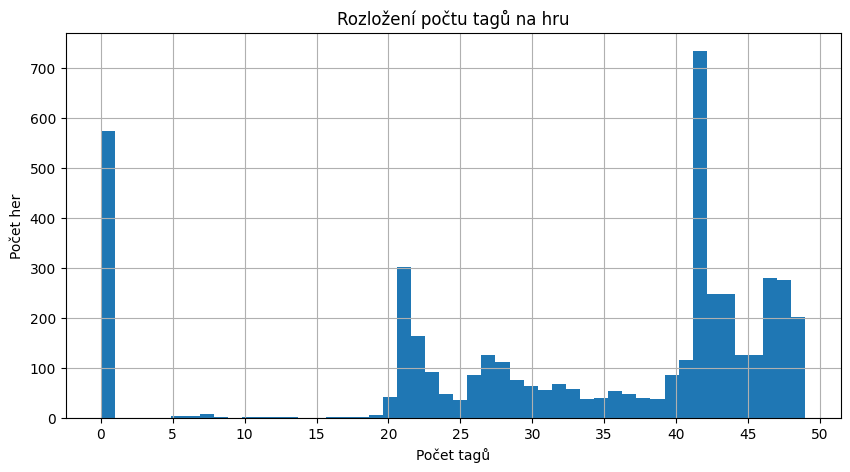

In [5]:
# Počty togů pro hry
# Filtrování extrémů
filtered_tags = tags_df[tags_df['num_tags'] < 50]

plt.figure(figsize=(10, 5))
filtered_tags['num_tags'].plot.hist(bins=50)
plt.title("Rozložení počtu tagů na hru")
plt.xlabel("Počet tagů")
plt.ylabel("Počet her")
plt.xticks(range(0, 51, 5))
plt.grid(True)
plt.show()

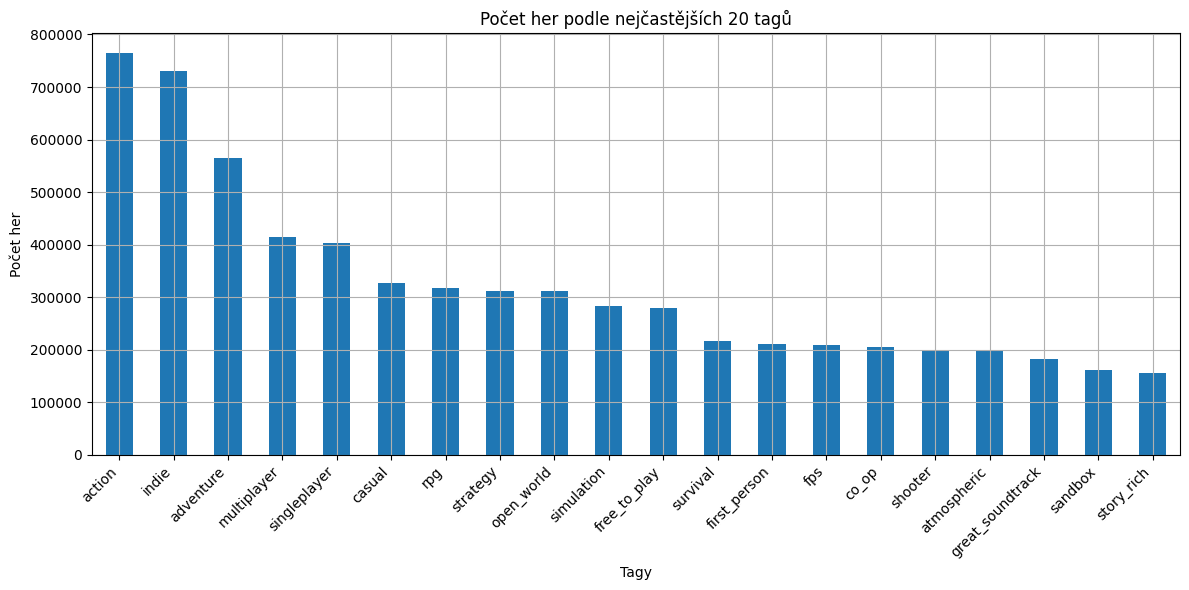

In [6]:
# Nejčastější tagy
tag_counts = tags_df.drop(columns=['appid', 'num_tags']).sum().sort_values(ascending=False)
tag_counts.head(20).plot(kind='bar', figsize=(12, 6))
plt.title("Počet her podle nejčastějších 20 tagů")
plt.ylabel("Počet her")
plt.xlabel("Tagy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

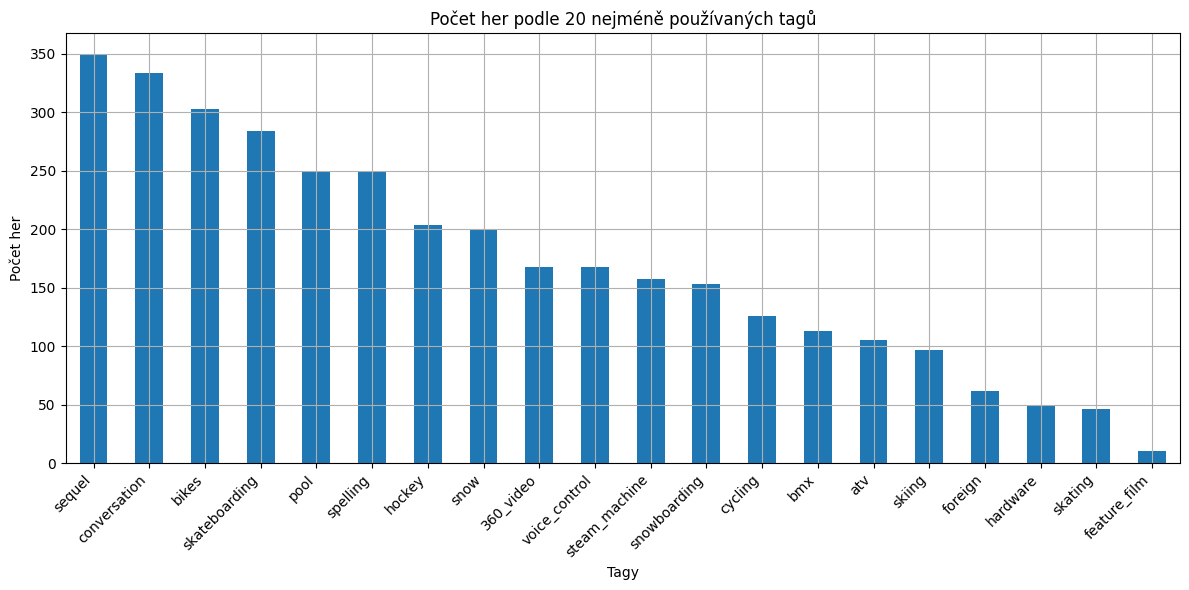

In [7]:
# Nejméně časté tagy
tag_counts.tail(20).plot(kind='bar', figsize=(12, 6))
plt.title("Počet her podle 20 nejméně používaných tagů")
plt.ylabel("Počet her")
plt.xlabel("Tagy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

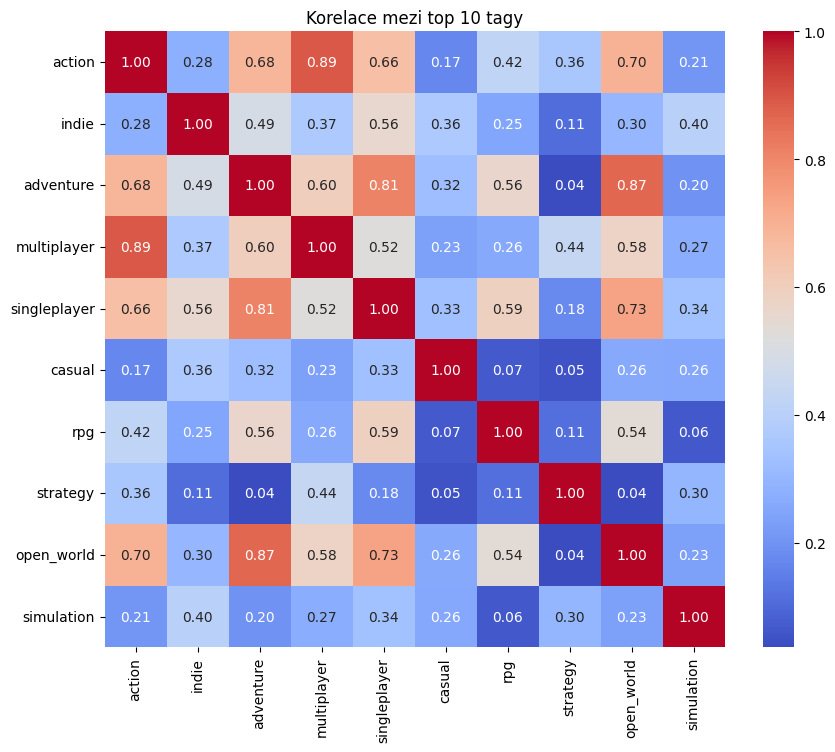

In [8]:
# Korelace mezi tagy
common_tags = tag_counts.head(10).index.tolist()
tag_corr = tags_df[common_tags].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(tag_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelace mezi top 10 tagy")
plt.show()

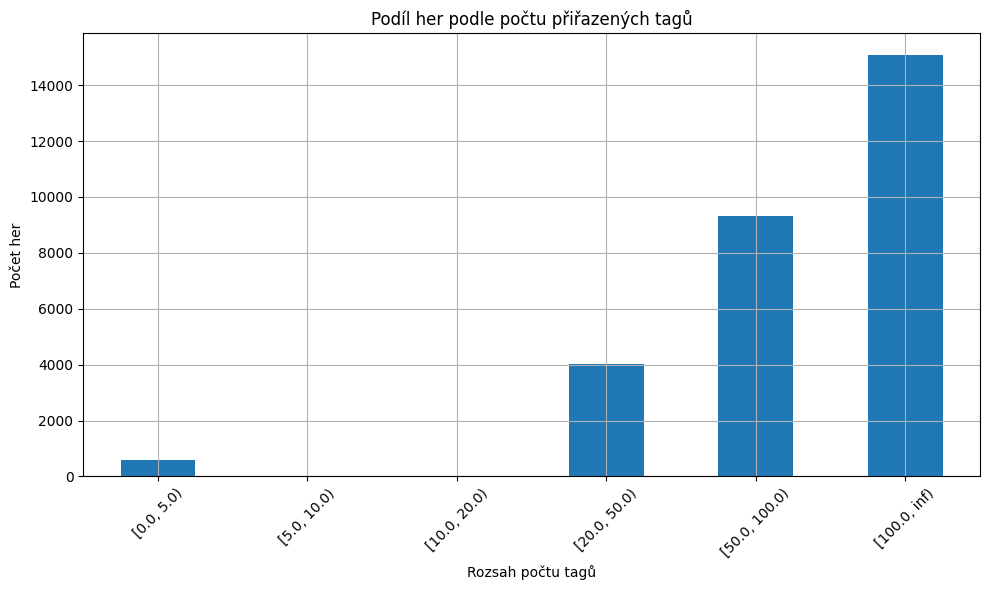

In [9]:
# Podíl her podle počtu tagů
# Rozdělení do kategorií podle počtu tagů
tag_bins = pd.cut(tags_df['num_tags'], bins=[0, 5, 10, 20, 50, 100, float('inf')], right=False)
bin_counts = tag_bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar')
plt.title("Podíl her podle počtu přiřazených tagů")
plt.xlabel("Rozsah počtu tagů")
plt.ylabel("Počet her")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()